In [4]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append('../../src')
from paths import OFFSTD_DB_DIR, FLTRD_DB_DIR

from utils.functions import clean_folder, load_datasets_from_csv
from outliers.plots import show_outliers
from outliers.functions import find_outliers, drop_outliers

from plot import show_serie



from paths import ROOT_DIR
IMG_PATH = ROOT_DIR+'/img/outliers'
if not os.path.exists(IMG_PATH):
    os.mkdir(IMG_PATH)

In [5]:
%load_ext autoreload
%autoreload 2

In [6]:
clean_folder(FLTRD_DB_DIR, "*.csv")

In [7]:
 datasets = load_datasets_from_csv(OFFSTD_DB_DIR).copy()

### Finding outliers using percentile methodology

## REMOVING OUTLIERS

<AxesSubplot:>

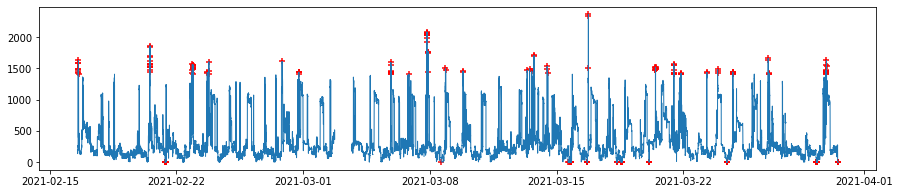

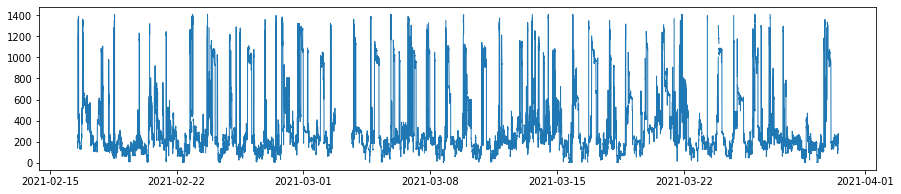

In [8]:
#show_serie(datasets['house']['Pwr'])
fltr = find_outliers(datasets['house']['Pwr'], 0.005)
show_outliers(datasets['house']['Pwr'], datasets['house']['Pwr'].loc[fltr])
drop_outliers(datasets['house']['Pwr'], fltr)
show_serie(datasets['house']['Pwr'])

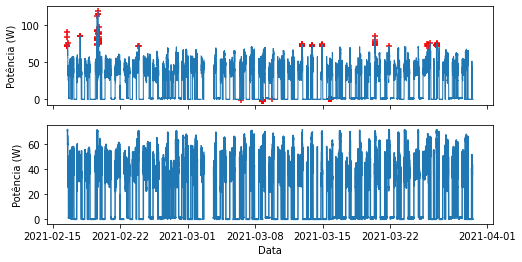

In [9]:
fig, ax = plt.subplots(2,1, figsize=(8,4), sharex=True)

ax[0].plot(datasets['computer']['Pwr'], linewidth=1)

fltr = find_outliers(datasets['computer']['Pwr'], 0.005)
outliers  = datasets['computer']['Pwr'].loc[fltr]

ax[0].scatter(x=outliers.index, y=outliers, color='r', marker='+', s=30)

drop_outliers(datasets['computer']['Pwr'], fltr)
ax[1].plot(datasets['computer']['Pwr'])

ax[0].set_ylabel('Potência (W)')
ax[1].set_ylabel('Potência (W)')
ax[1].set_xlabel('Data')

plt.savefig(IMG_PATH+"/computer_outliers.jpeg", dpi=600, pad_inches=0.05, bbox_inches='tight')

<AxesSubplot:>

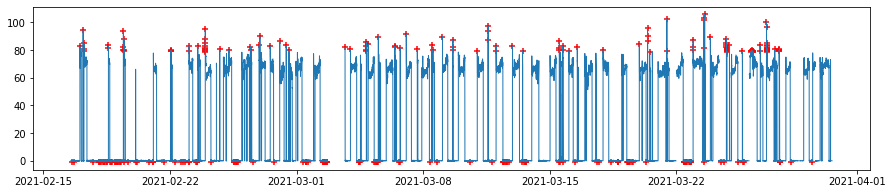

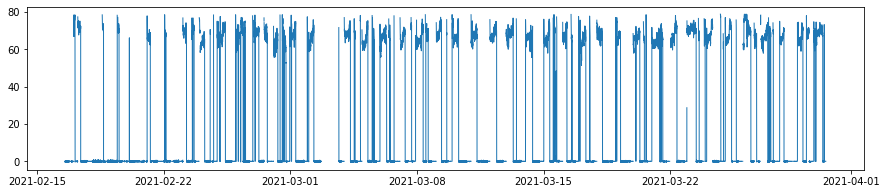

In [10]:
#show_serie(datasets['fan']['Pwr'])
fltr = find_outliers(datasets['fan']['Pwr'], 0.005)
show_outliers(datasets['fan']['Pwr'], datasets['fan']['Pwr'].loc[fltr])
drop_outliers(datasets['fan']['Pwr'], fltr)
show_serie(datasets['fan']['Pwr'])

<AxesSubplot:>

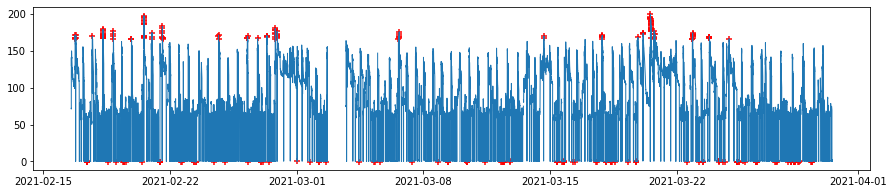

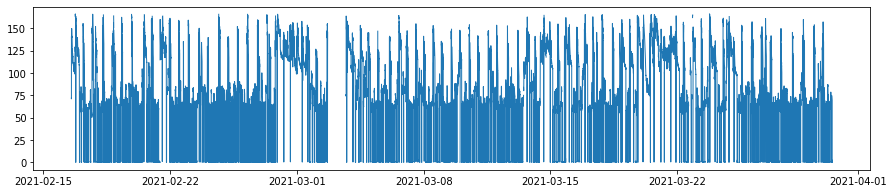

In [11]:
#show_serie(datasets['fridge']['Pwr'])
fltr = find_outliers(datasets['fridge']['Pwr'], 0.005)
show_outliers(datasets['fridge']['Pwr'], datasets['fridge']['Pwr'].loc[fltr])
drop_outliers(datasets['fridge']['Pwr'], fltr)
show_serie(datasets['fridge']['Pwr'])

In [12]:
for key in datasets:
    print(key)
    datasets[key].name = str(key)
    datasets[key].to_csv(FLTRD_DB_DIR+"/{}.csv".format(key), float_format='%.4f')

external
fridge
air
computer
fan
house
pump
